# We are going to predict price of house using various features such as no. of rooms,quality,garage,neighborhood etc using sklearn's llinear regression algorithm

#importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

#reading data

In [2]:
train = pd.read_csv(r'C:\Users\sarthak\Desktop\kaggle\house price\train.csv')
test = pd.read_csv(r'C:\Users\sarthak\Desktop\kaggle\house price\test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data exploration

In [3]:
train.shape

(1460, 81)

In [4]:
test.shape

(1459, 80)

In [5]:
data=pd.concat([train.iloc[:,:-1],test],axis=0)
data.shape

(2919, 80)

In [6]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
data.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          

# Data Vizualisation

Text(0.5, 0, 'Sale Price')

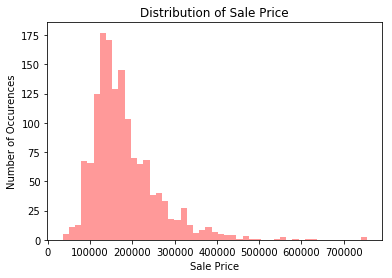

In [8]:
sns.distplot(train['SalePrice'], color="r", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price")

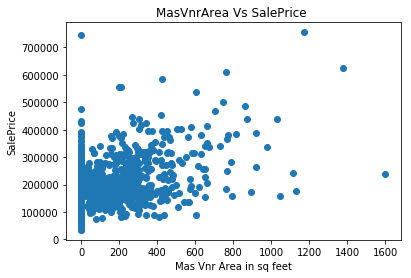

In [9]:
plt.scatter(train["MasVnrArea"],train["SalePrice"])
plt.title("MasVnrArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Mas Vnr Area in sq feet");

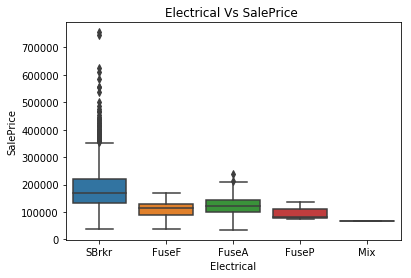

In [10]:
sns.boxplot("Electrical","SalePrice",data=train)
plt.title("Electrical Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Electrical");

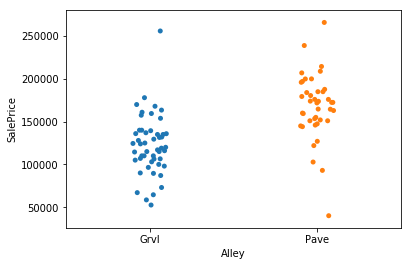

In [11]:
sns.stripplot(x=train["Alley"], y=train["SalePrice"],jitter=True);

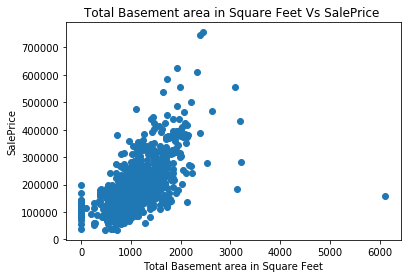

In [12]:
plt.scatter(train["TotalBsmtSF"],train["SalePrice"])
plt.title("Total Basement area in Square Feet Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement area in Square Feet");

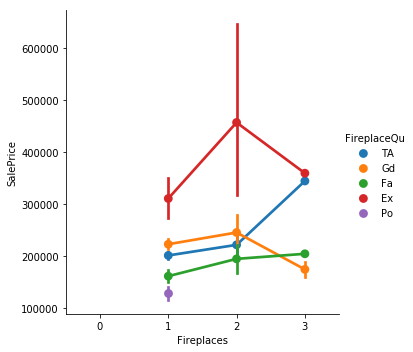

In [13]:
sns.factorplot("Fireplaces","SalePrice",data=train,hue="FireplaceQu");

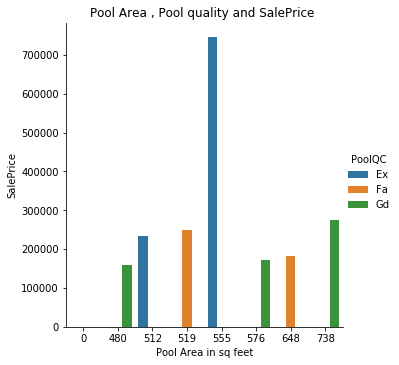

In [14]:
sns.factorplot("PoolArea","SalePrice",data=train,hue="PoolQC",kind='bar')
plt.title("Pool Area , Pool quality and SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Pool Area in sq feet");

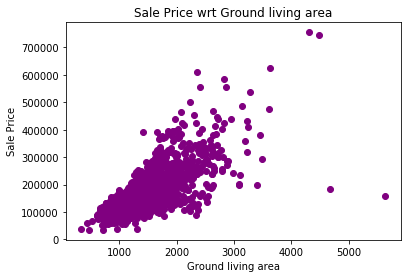

In [15]:
plt.scatter( train["GrLivArea"],train["SalePrice"],color='purple')
plt.title("Sale Price wrt Ground living area")
plt.ylabel('Sale Price')
plt.xlabel("Ground living area");

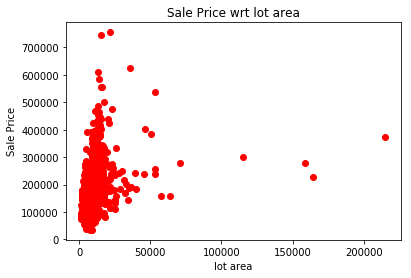

In [16]:
plt.scatter( train["LotArea"],train["SalePrice"],color='red')
plt.title("Sale Price wrt lot area")
plt.ylabel('Sale Price')
plt.xlabel("lot area");

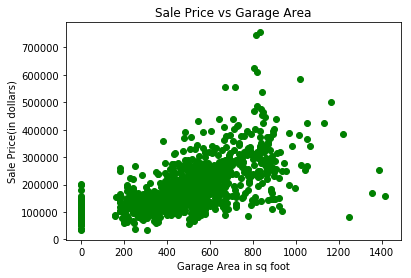

In [17]:
plt.scatter(train["GarageArea"],train.SalePrice, color='green')
plt.title("Sale Price vs Garage Area")
plt.ylabel('Sale Price(in dollars)')
plt.xlabel("Garage Area in sq foot");

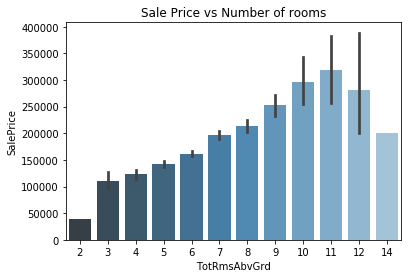

In [18]:
sns.barplot(train["TotRmsAbvGrd"],train["SalePrice"],palette="Blues_d")
plt.title("Sale Price vs Number of rooms");

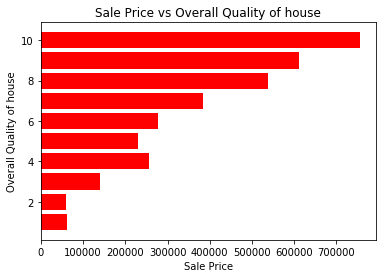

In [19]:
plt.barh(train["OverallQual"],width=train["SalePrice"],color="r")
plt.title("Sale Price vs Overall Quality of house")
plt.ylabel("Overall Quality of house")
plt.xlabel("Sale Price");

#differentiating categorical and numerical features

In [20]:
num_features=data.select_dtypes(include=['int64','float64'])
categorical_features=data.select_dtypes(include='object')

In [21]:
num_features.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [22]:
num_features.describe().iloc[:,:20]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000


In [23]:
num_features.describe().iloc[:,20:]

,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [24]:
categorical_features.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,...,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,...,1723,1230,2604,2654,2641,4,329,95,2525,2402


# Outlier Treatment

In [25]:
def outlier_handle(col):
    plt.scatter(data.index,data[col])
    plt.show()

In [26]:
out_list = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','LowQualFinSF','WoodDeckSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

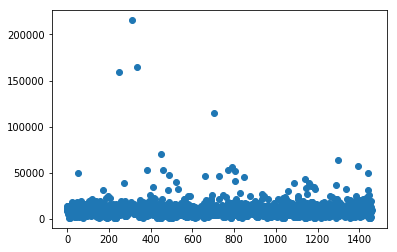

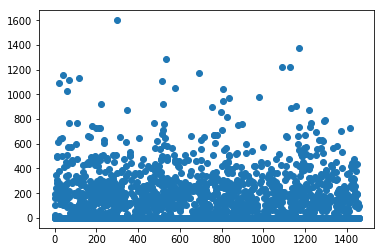

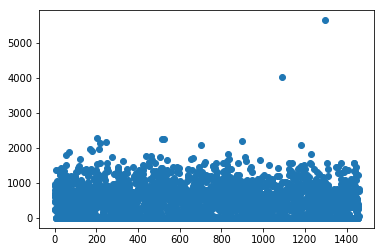

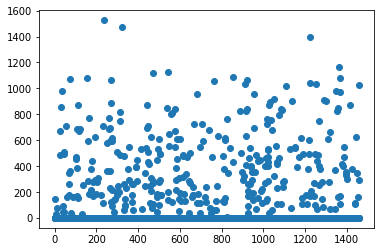

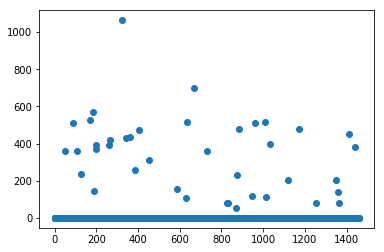

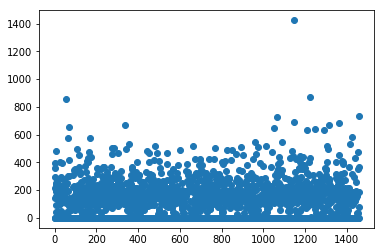

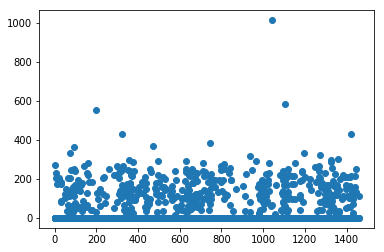

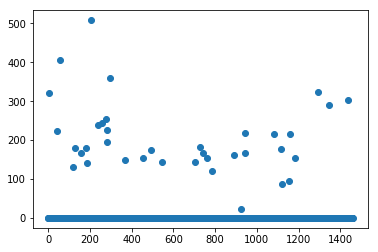

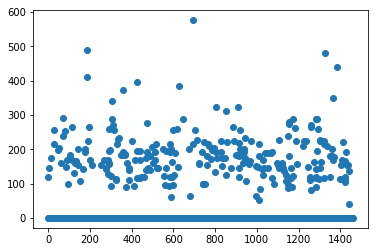

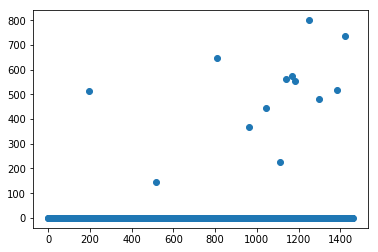

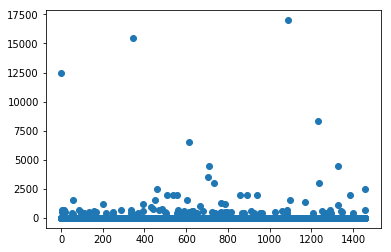

In [27]:
for i in out_list:
    outlier_handle(i)

In [28]:
median = data.loc[data['LotArea']<100000 , 'LotArea'].median()
data["LotArea"] = np.where(data["LotArea"] >100000, median,data["LotArea"])

In [29]:
median = data.loc[data['MasVnrArea']<1200 , 'MasVnrArea'].median()
data["MasVnrArea"] = np.where(data["MasVnrArea"] >1200, median,data["MasVnrArea"])

In [30]:
median = data.loc[data['BsmtFinSF1']<3000 , 'BsmtFinSF1'].median()
data["BsmtFinSF1"] = np.where(data["BsmtFinSF1"] >3000, median,data["BsmtFinSF1"])

In [31]:
median = data.loc[data['BsmtFinSF2']<1300 , 'BsmtFinSF2'].median()
data["BsmtFinSF2"] = np.where(data["BsmtFinSF2"] >1300, median,data["BsmtFinSF2"])

In [32]:
median = data.loc[data['WoodDeckSF']<800 , 'WoodDeckSF'].median()
data["WoodDeckSF"] = np.where(data["WoodDeckSF"] >800, median,data["WoodDeckSF"])

In [33]:
median = data.loc[data['EnclosedPorch']<400, 'EnclosedPorch'].median()
data["EnclosedPorch"] = np.where(data["EnclosedPorch"] >400, median,data["EnclosedPorch"])

In [34]:
median = data.loc[data['PoolArea']<100 , 'PoolArea'].median()
data["PoolArea"] = np.where(data["PoolArea"] >100, median,data["PoolArea"])

In [35]:
median = data.loc[data['MiscVal']<2500 , 'MiscVal'].median()
data["MiscVal"] = np.where(data["MiscVal"] >2500, median,data["MiscVal"])

# Handling missing Data

In [36]:
data.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageCond        159
GarageQual        159
GarageYrBlt       159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF1          1
Exterior1st         1
Exterior2nd         1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
SaleType            1
                 ... 
YearBuilt           0
OverallCond         0
SaleCondition       0
Heating             0
ExterQual           0
ExterCond           0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF

In [37]:
data['LotFrontage'].fillna(int(data['LotFrontage'].mean()),inplace=True)

In [38]:
data['LotFrontage'].isnull().sum()

0

In [39]:
features=['MSZoning','Electrical','Functional','KitchenQual','SaleType','Exterior2nd','Exterior1st','Utilities','PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageQual','GarageFinish','GarageType','BsmtCond','BsmtExposure','BsmtQual','BsmtFinType2','BsmtFinType1','MasVnrType']
for name in features:
    data[name].fillna('different',inplace=True)

In [40]:
data[features].isnull().sum()

MSZoning        0
Electrical      0
Functional      0
KitchenQual     0
SaleType        0
Exterior2nd     0
Exterior1st     0
Utilities       0
PoolQC          0
MiscFeature     0
Alley           0
Fence           0
FireplaceQu     0
GarageCond      0
GarageQual      0
GarageFinish    0
GarageType      0
BsmtCond        0
BsmtExposure    0
BsmtQual        0
BsmtFinType2    0
BsmtFinType1    0
MasVnrType      0
dtype: int64

In [41]:
zero=['GarageYrBlt','GarageArea','MasVnrArea','BsmtHalfBath','BsmtHalfBath','BsmtFullBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageCars']
for name in zero:
    data[name].fillna(0,inplace=True)

In [42]:
data[zero].isnull().sum()

GarageYrBlt     0
GarageArea      0
MasVnrArea      0
BsmtHalfBath    0
BsmtHalfBath    0
BsmtFullBath    0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
GarageCars      0
dtype: int64

In [43]:
data.isnull().sum().sum()

0

In [44]:
data = data.drop(columns=['Id','LowQualSF','3SsnPorch','ScreenPorch'],axis=1)

KeyError: "['LowQualSF'] not found in axis"

In [45]:
# WE DO NOT HAVE ANY MISSING VALUES IN OUR DATA

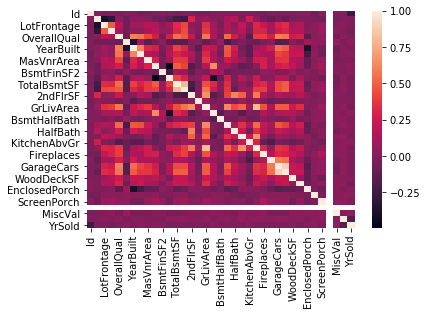

In [46]:
corr = data.corr()
sns.heatmap(corr)

In [47]:
data.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [48]:
# FUNCTION FOR CREATING DUMMY VARIABLES
def dummies(D):
    dummies_df=pd.DataFrame()
    for name in D.select_dtypes(include='object').columns:
        dummies = pd.get_dummies(D[name], drop_first=False)
        dummies = dummies.add_prefix("{}_".format(name))
        dummies_df=pd.concat([dummies_df,dummies],axis=1)
    return dummies_df

In [49]:
dummies_data=dummies(data)
dummies_data.shape

(2919, 275)

In [50]:
object_features=['MSZoning', 'Utilities','Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

In [51]:
data_drop=data.drop(columns=object_features,axis=1)
data_drop.shape

(2919, 37)

In [52]:
final_data=pd.concat([data_drop,dummies_data],axis=1)
final_data.shape

(2919, 312)

In [53]:
final_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleType_different',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=312)

In [54]:
train_data=final_data.iloc[:1460,:]
test_data=final_data.iloc[1460:,:]
print(train_data.shape)
test_data.shape

(1460, 312)


(1459, 312)

In [55]:
X=train_data

In [56]:
y=train.loc[:,'SalePrice']

# Training  model on training data and predicting values

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
reg = LinearRegression()

In [59]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
predict = reg.predict(test_data)

In [61]:
predict

array([113791.82800299, 162740.77941735, 186336.25158208, ...,
       180096.21398465, 112115.69695507, 222403.51213433])

# Gradient Boosting

In [66]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 15000, max_depth = 2, min_samples_split = 2,
          learning_rate = 0.005, loss = 'huber')

In [ ]:
clf.fit(X,y)
predictions = clf.predict(test_data)
predictions

In [ ]:
submission = {
    'Id': test.Id.values,
    'SalePrice': predictions
}
solution = pd.DataFrame(submission)
solution.head()

In [ ]:
solution.to_csv('submission.csv',index=False)